In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1358,2020-08-20,United Kingdom,321197.0,321098.0,41422.0,41397.0,99.0,25.0
1359,2020-08-20,Germany,226956.0,228621.0,9249.0,9253.0,-1665.0,-4.0
1360,2020-08-20,Iran,351717.0,347835.0,20216.0,19972.0,3882.0,244.0
1361,2020-08-20,Turkey,252881.0,253108.0,6035.0,6039.0,-227.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6032.314013206163
RMSE =  23808.134345696722


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  294.9060895084373
RMSE =  719.8070250686808


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  40061.96153846154
RMSE =  74184.48209591047
-- World performances for deaths --
MAE =  1595.4076923076923
RMSE =  1963.5915661006334


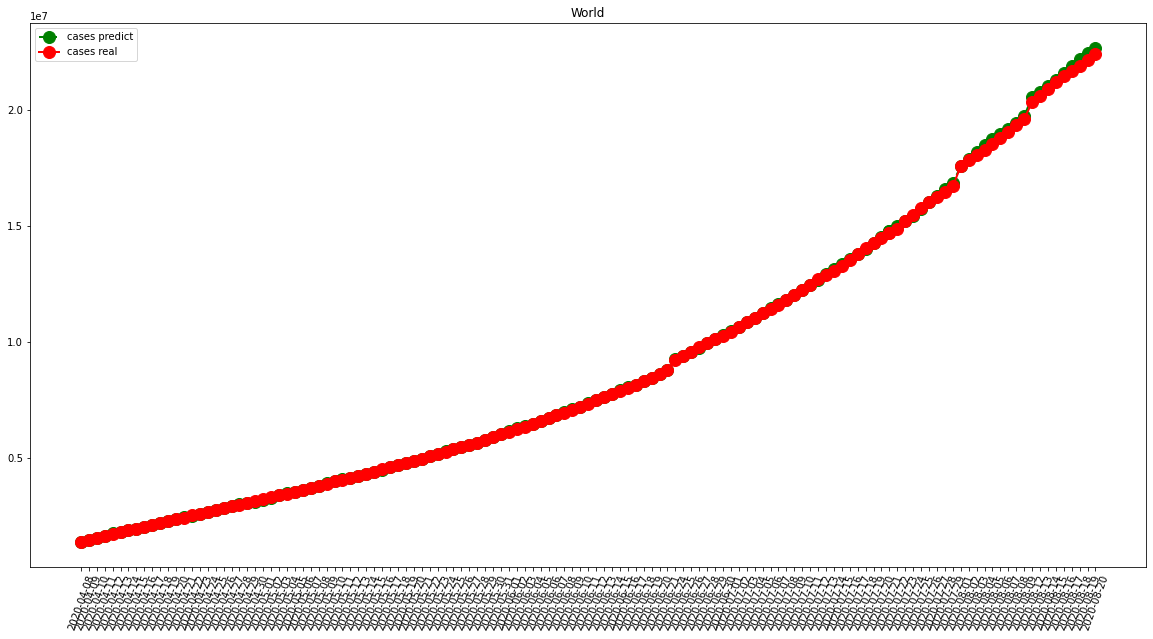

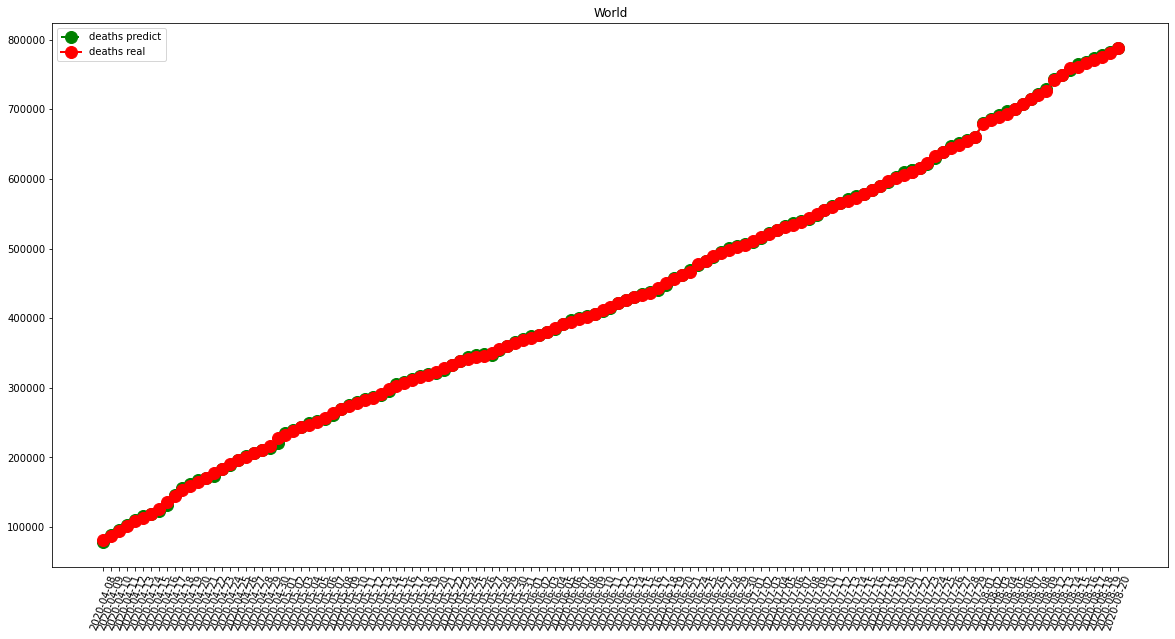

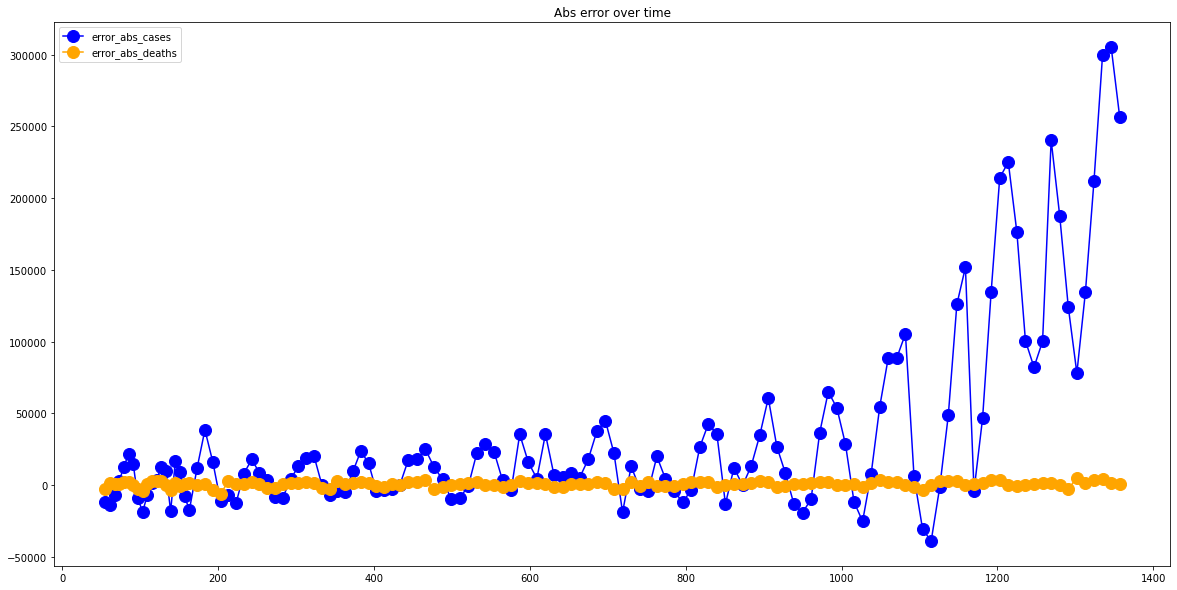

In [7]:
visShow("World")

-- France performances for cases --
MAE =  905.8357142857143
RMSE =  1387.2130823036114
-- France performances for deaths --
MAE =  131.6
RMSE =  283.3858550759774


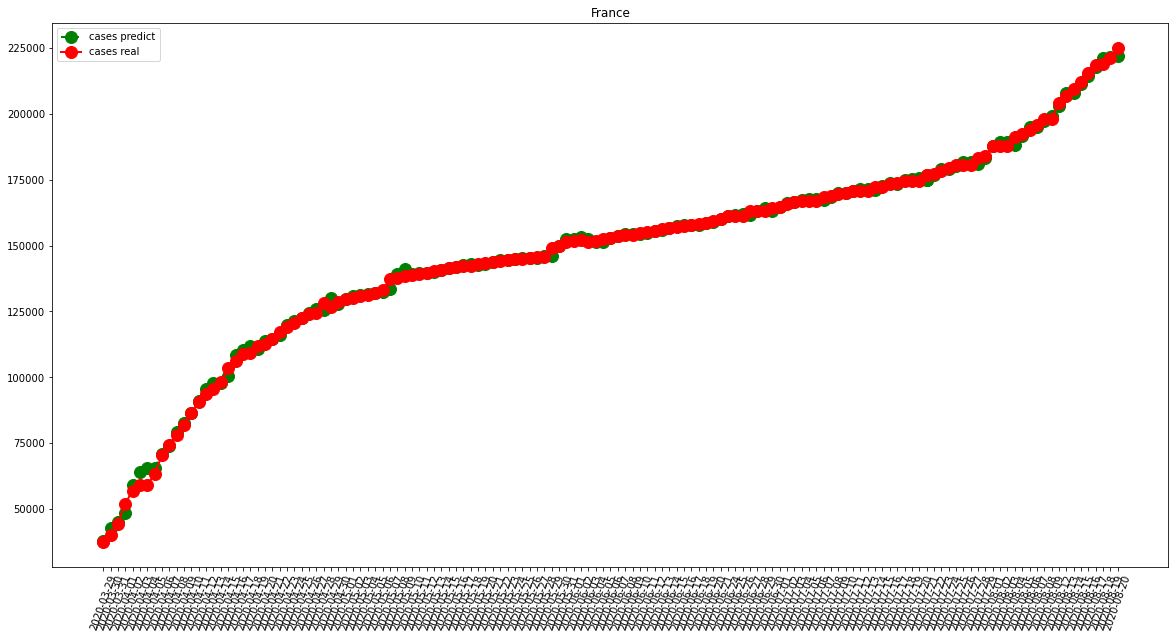

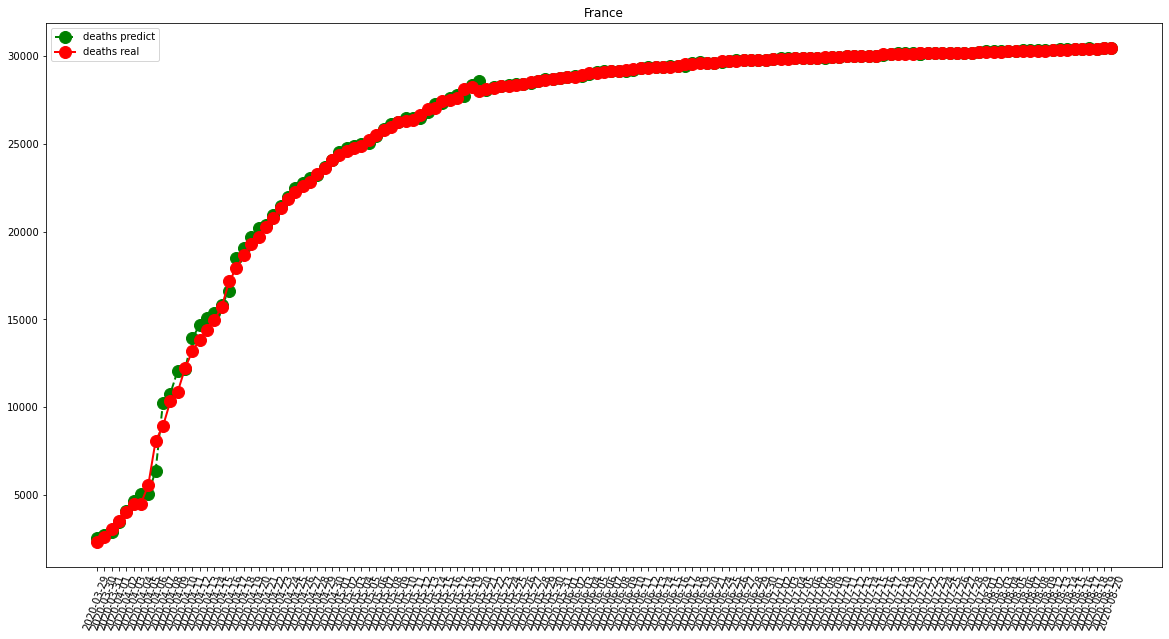

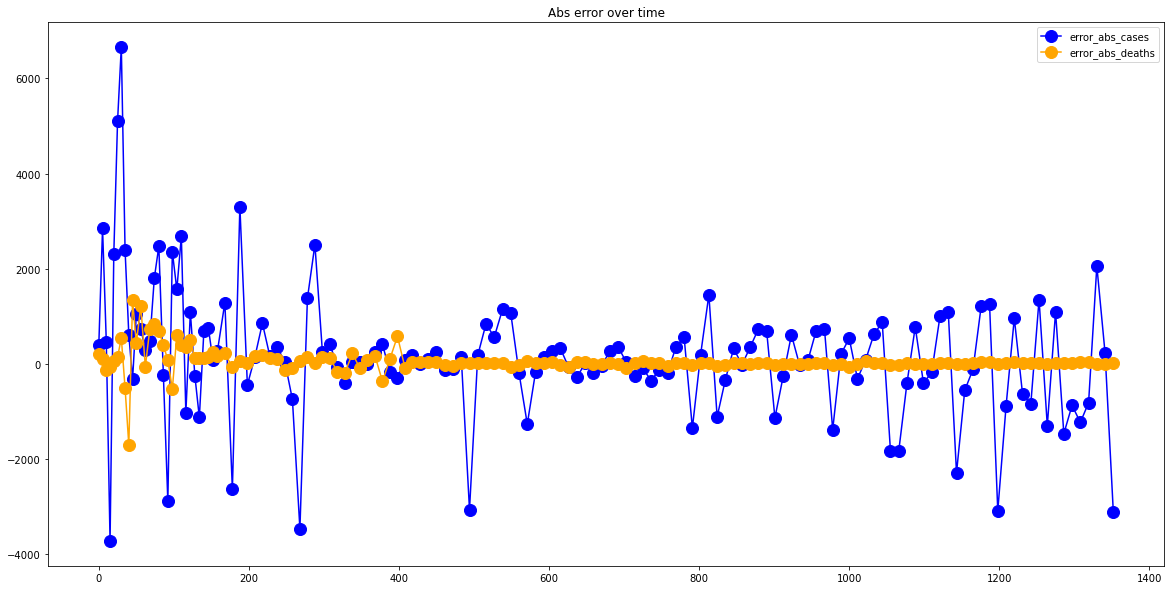

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.8285714285714
RMSE =  465.47439702492153
-- Italy performances for deaths --
MAE =  77.76428571428572
RMSE =  250.80602920526908


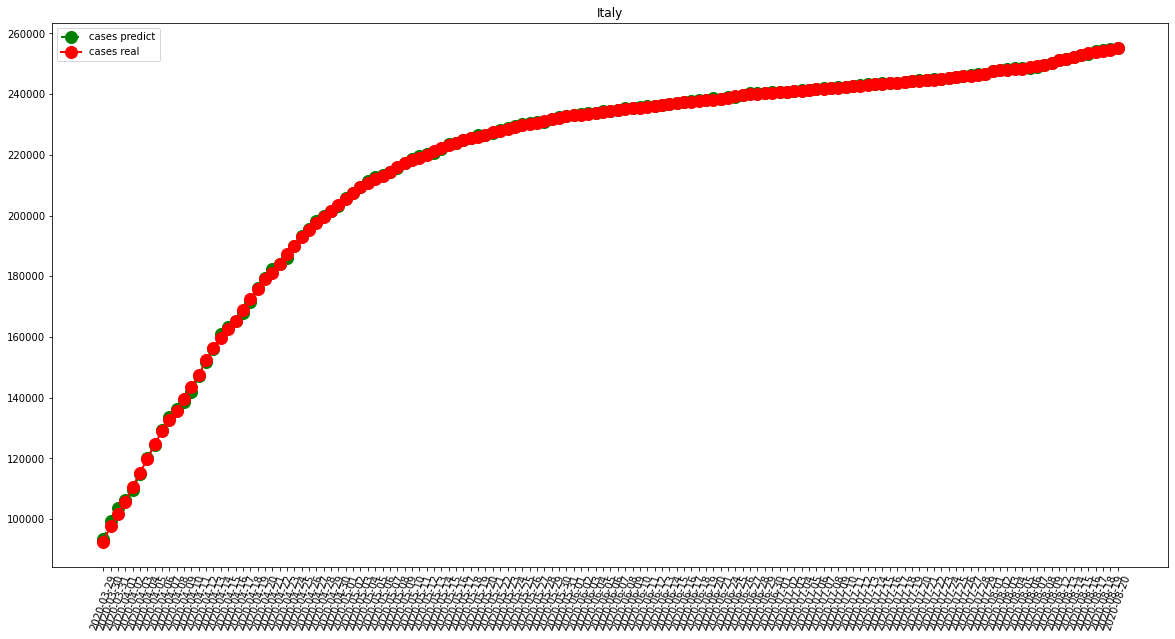

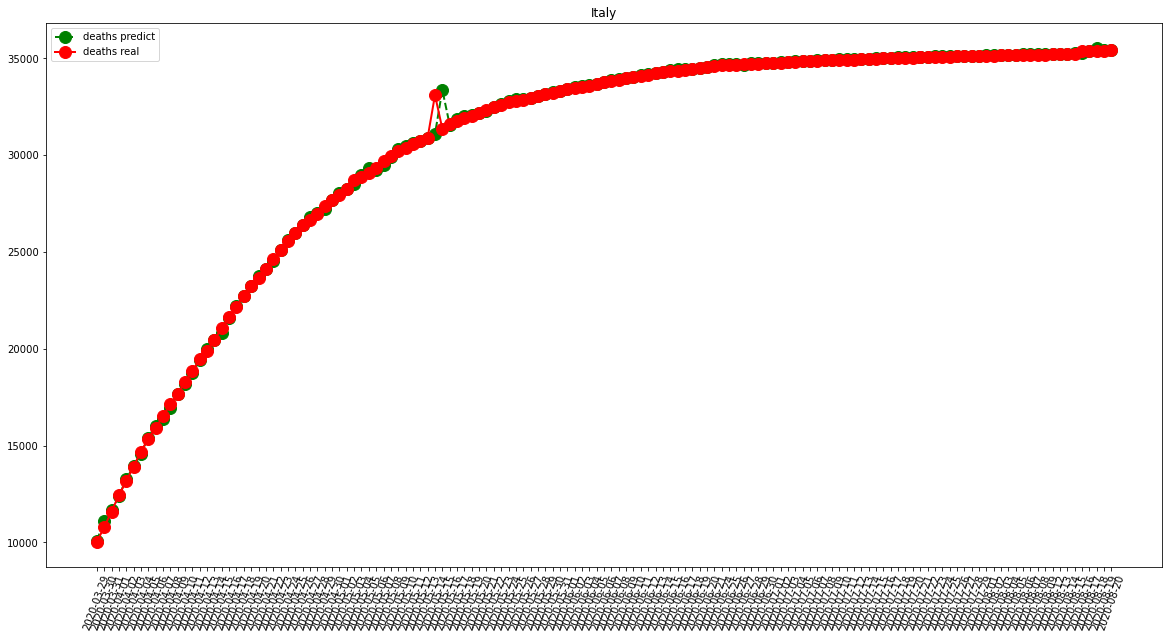

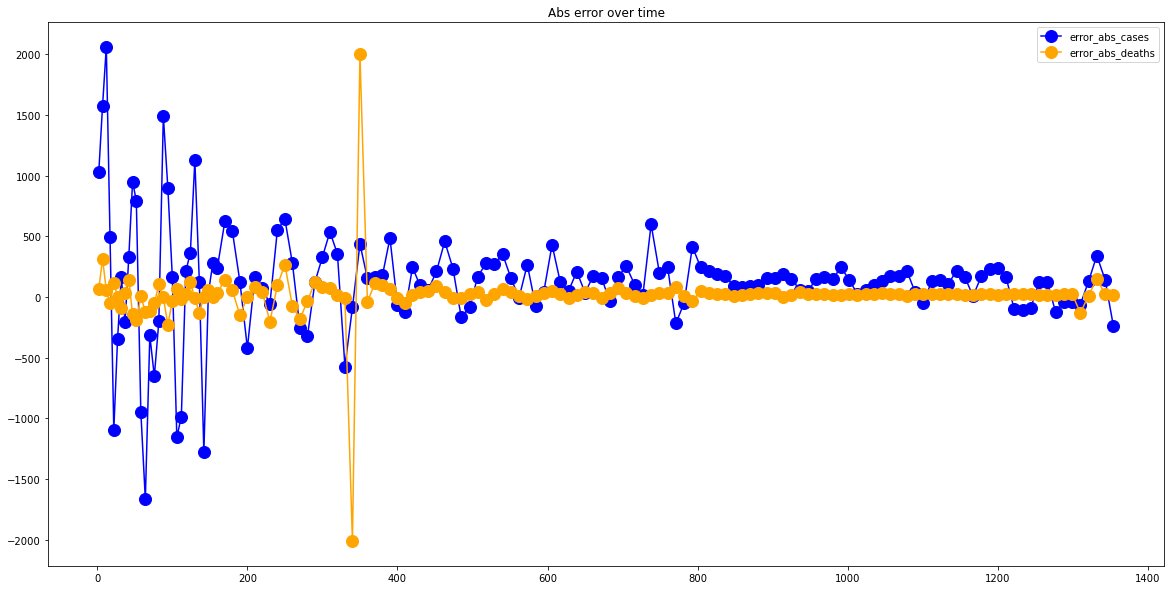

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1461.9642857142858
RMSE =  2799.1031765294297
-- Spain performances for deaths --
MAE =  134.30714285714285
RMSE =  343.25231244668987


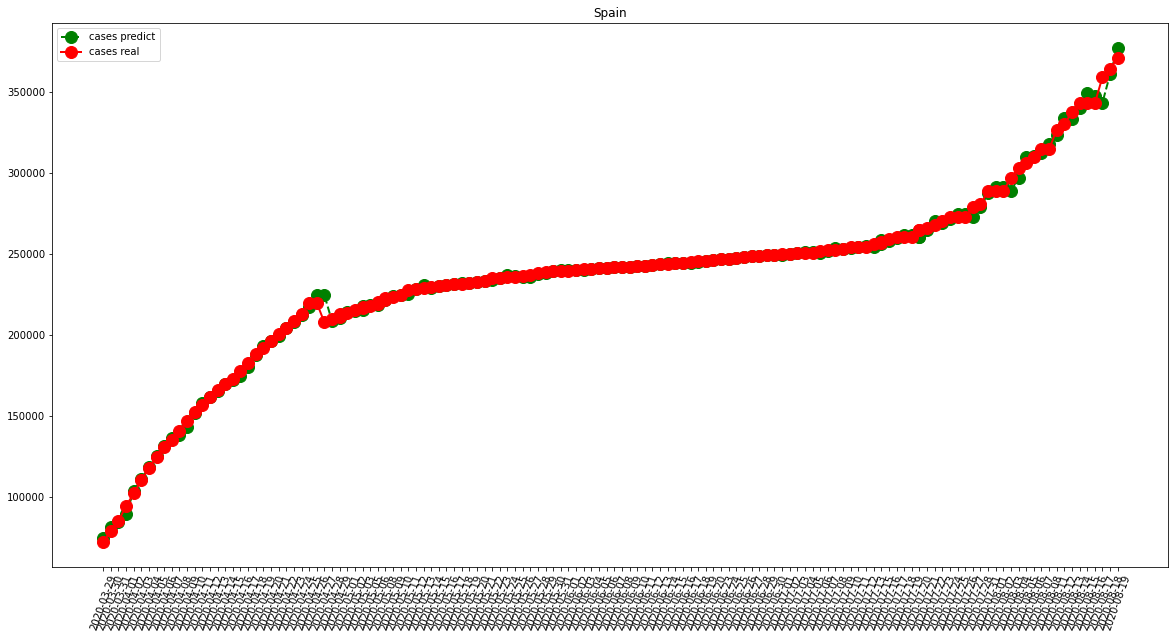

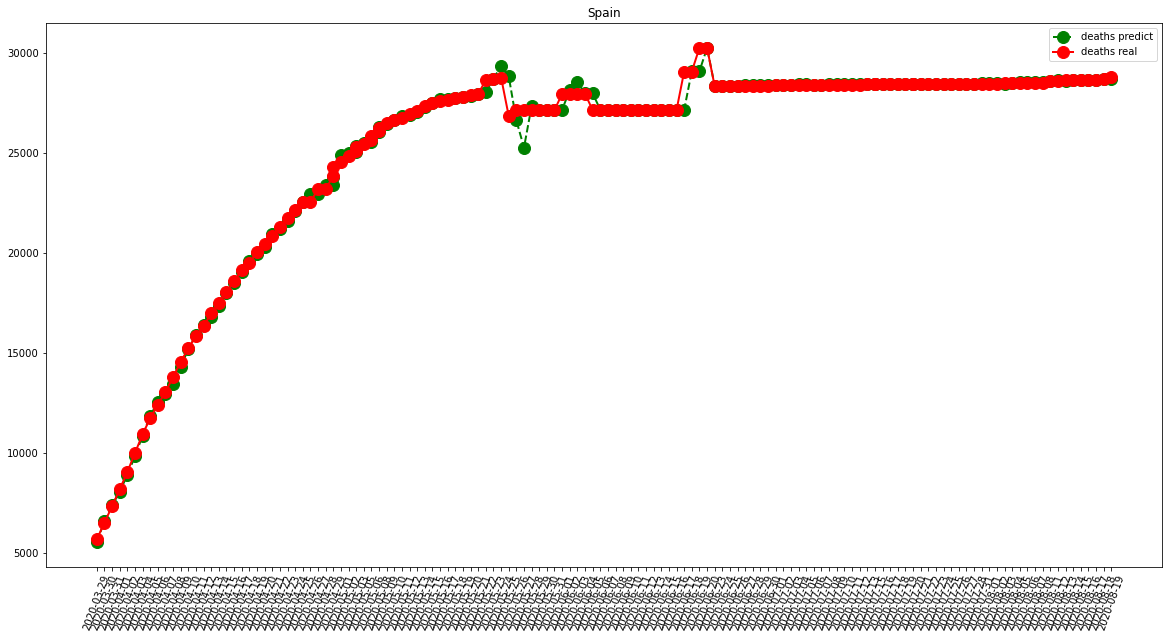

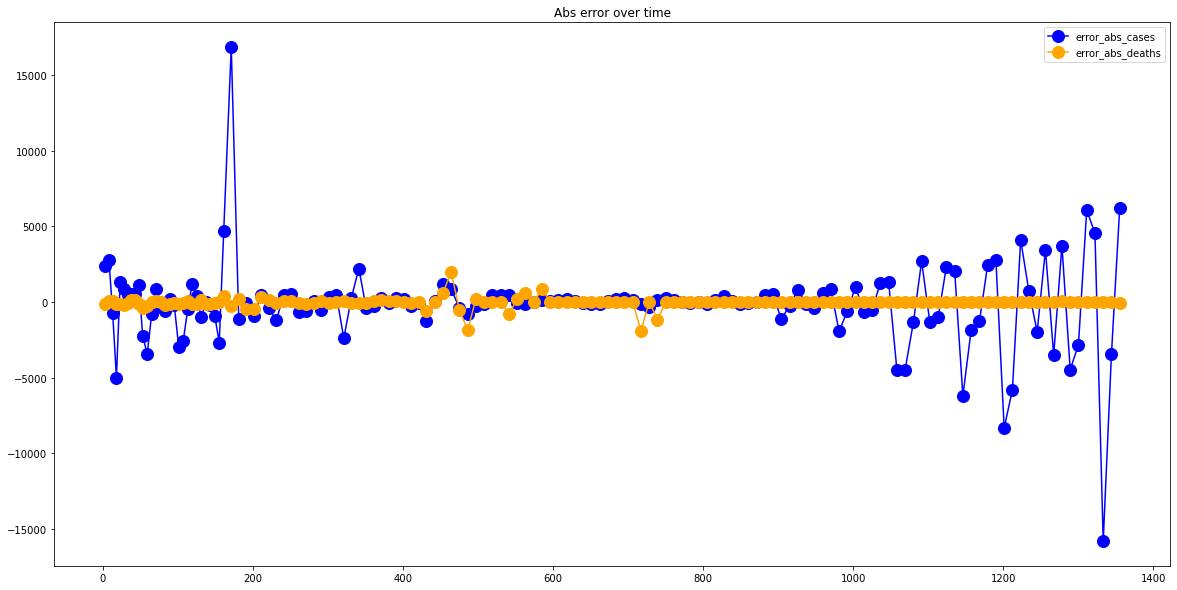

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  9264.75
RMSE =  14521.68209437185
-- United States performances for deaths --
MAE =  497.17857142857144
RMSE =  707.6138525253122


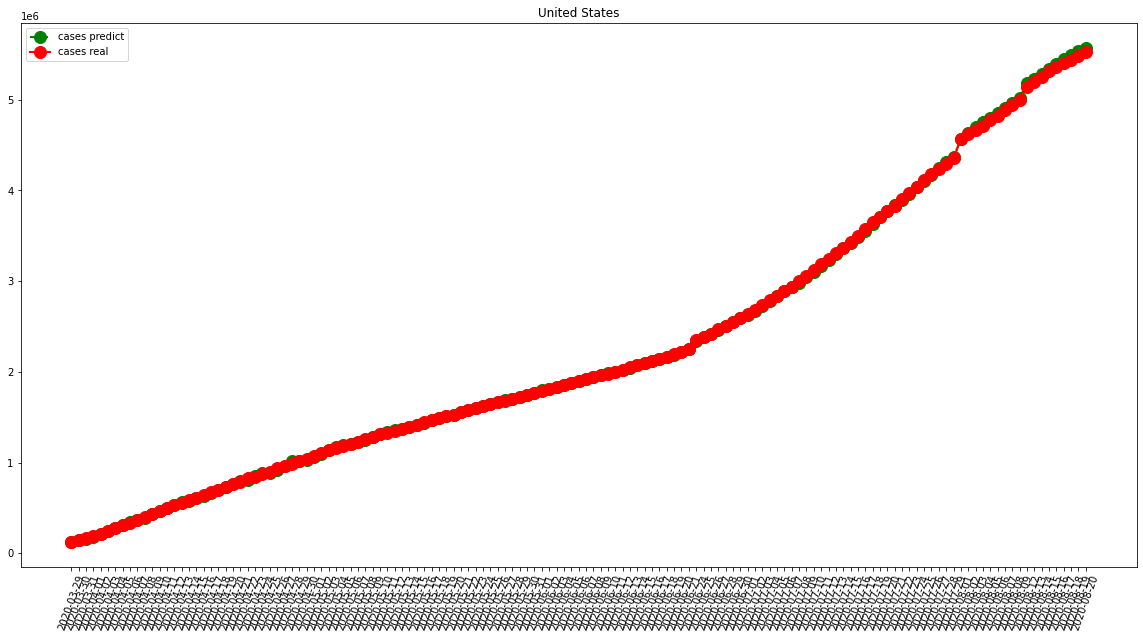

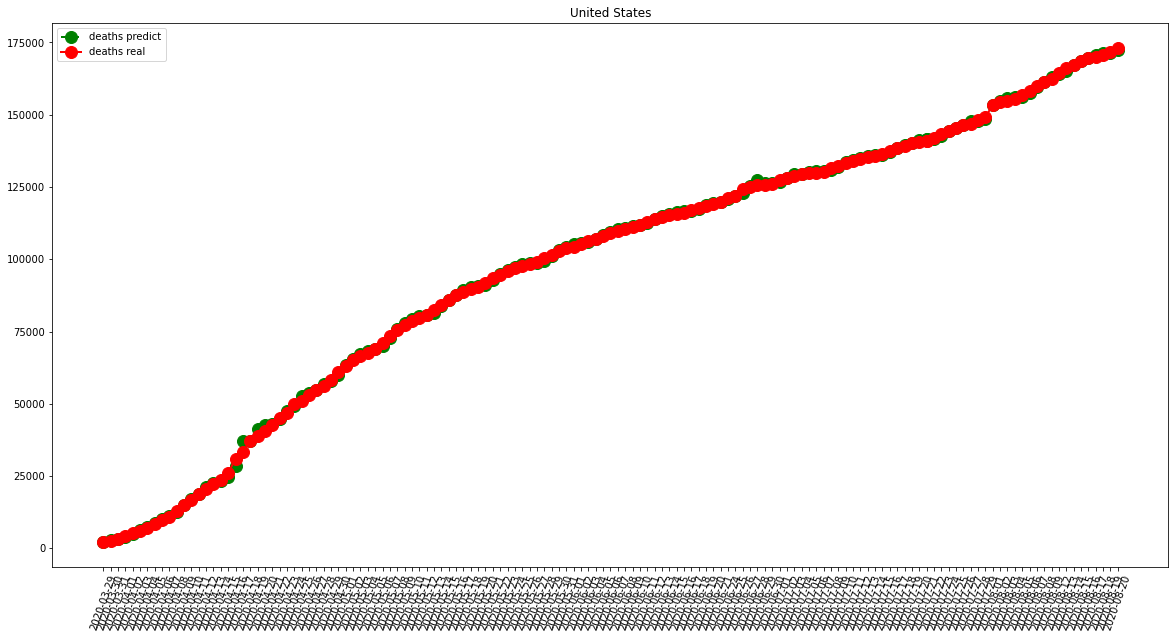

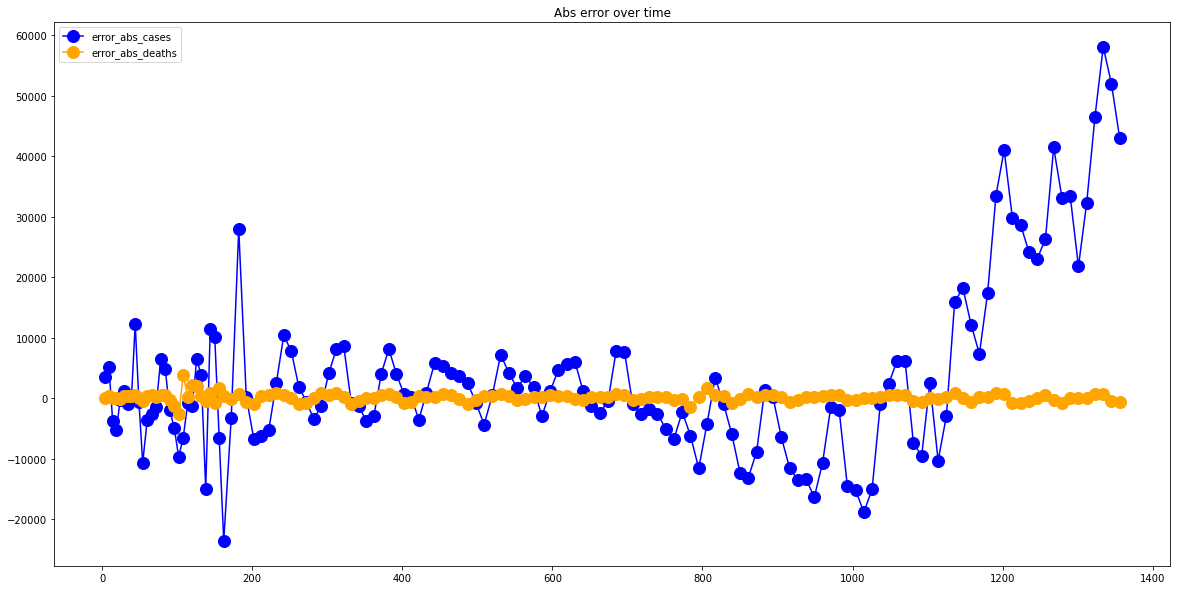

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  70.87142857142857
RMSE =  100.81234334856309
-- China performances for deaths --
MAE =  29.35
RMSE =  132.6993648386134


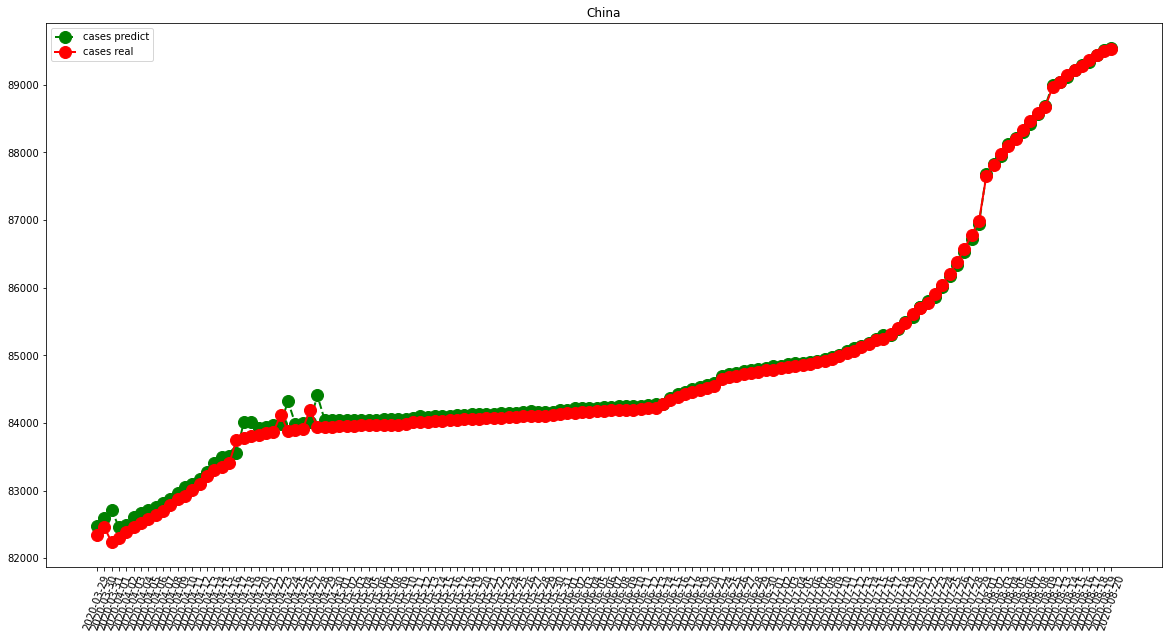

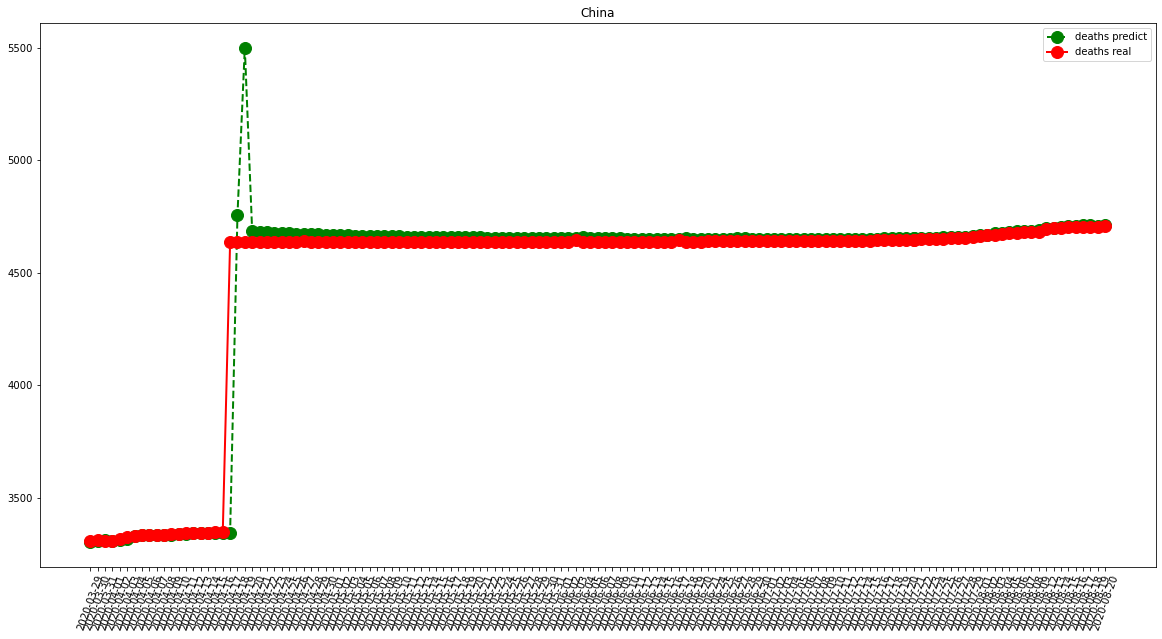

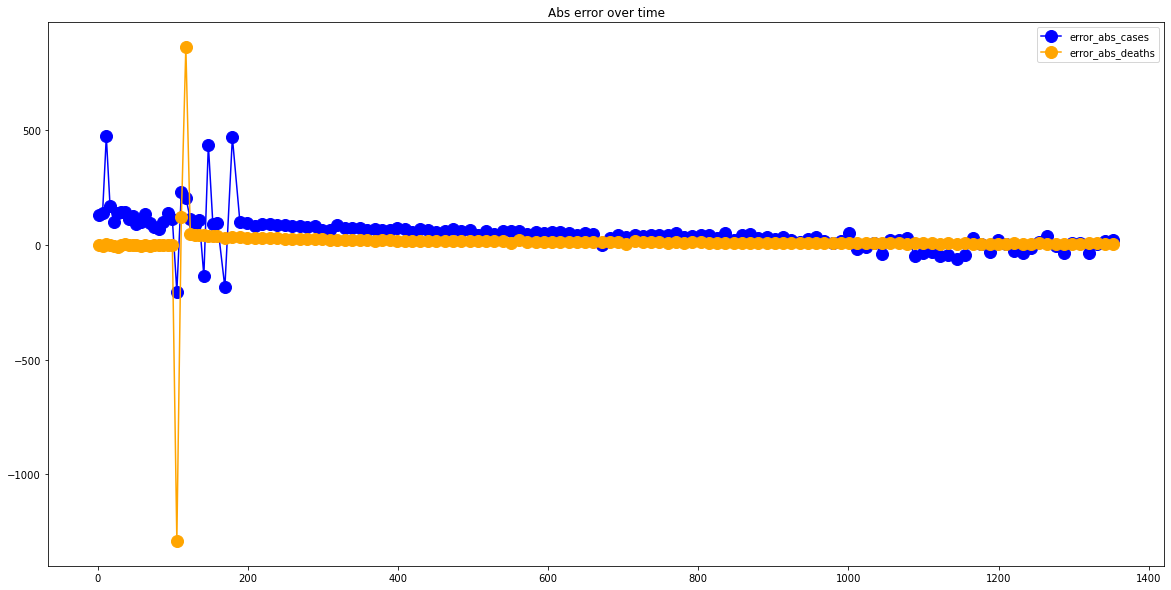

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1155.107142857143
RMSE =  3950.321994109196
-- United Kingdom performances for deaths --
MAE =  266.0357142857143
RMSE =  806.3028720205401


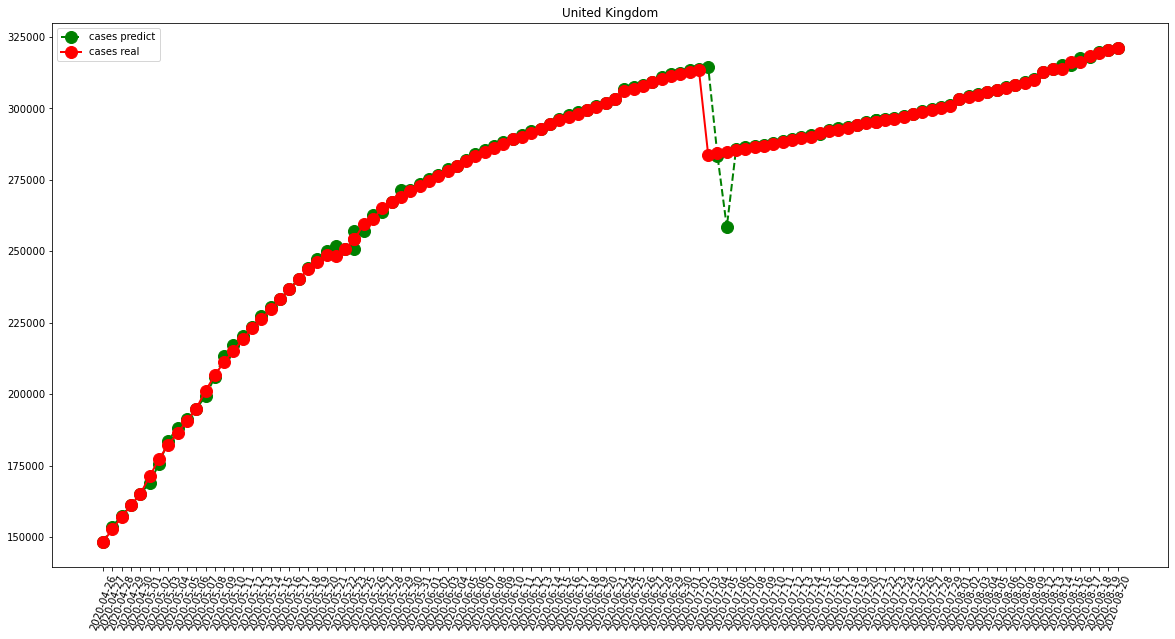

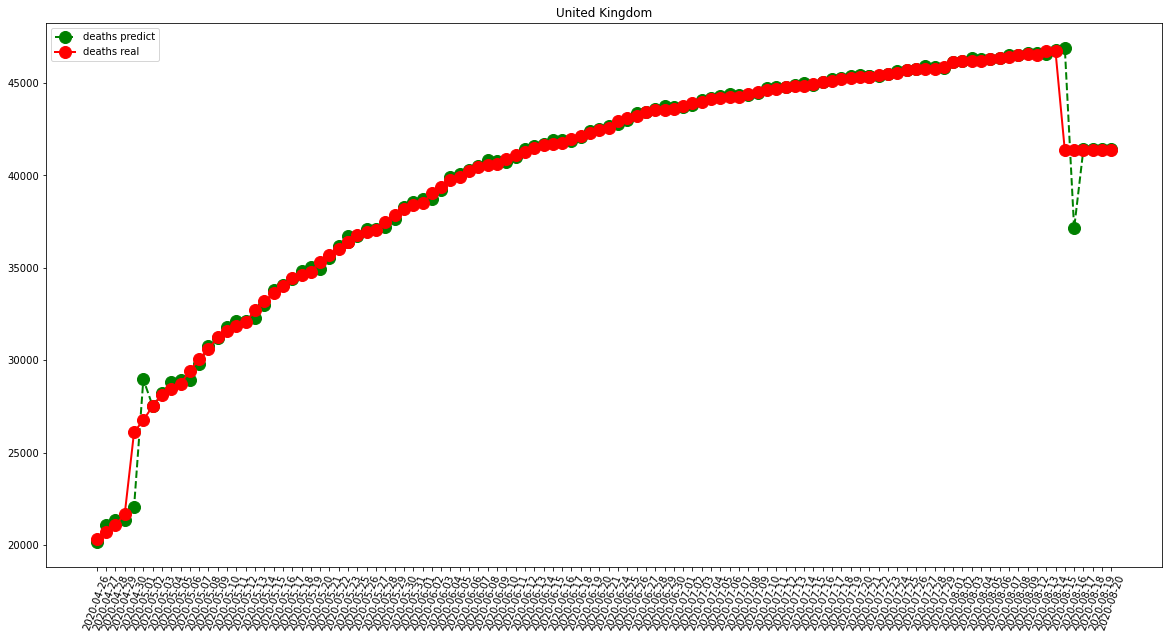

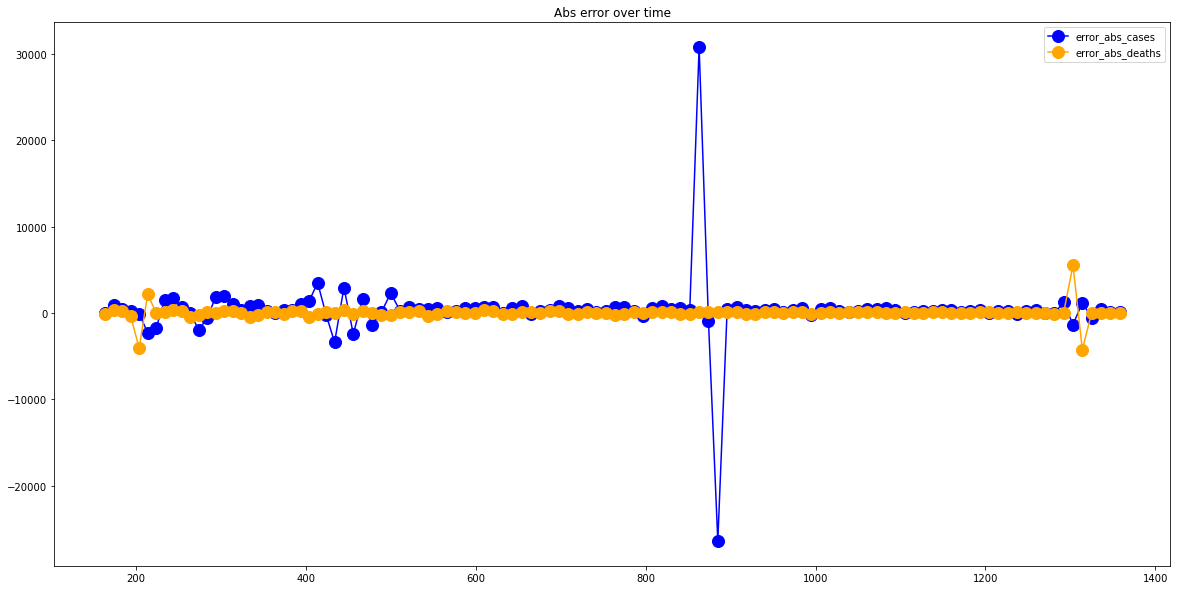

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  358.38392857142856
RMSE =  519.3342493038564
-- Germany performances for deaths --
MAE =  22.598214285714285
RMSE =  41.447578767815685


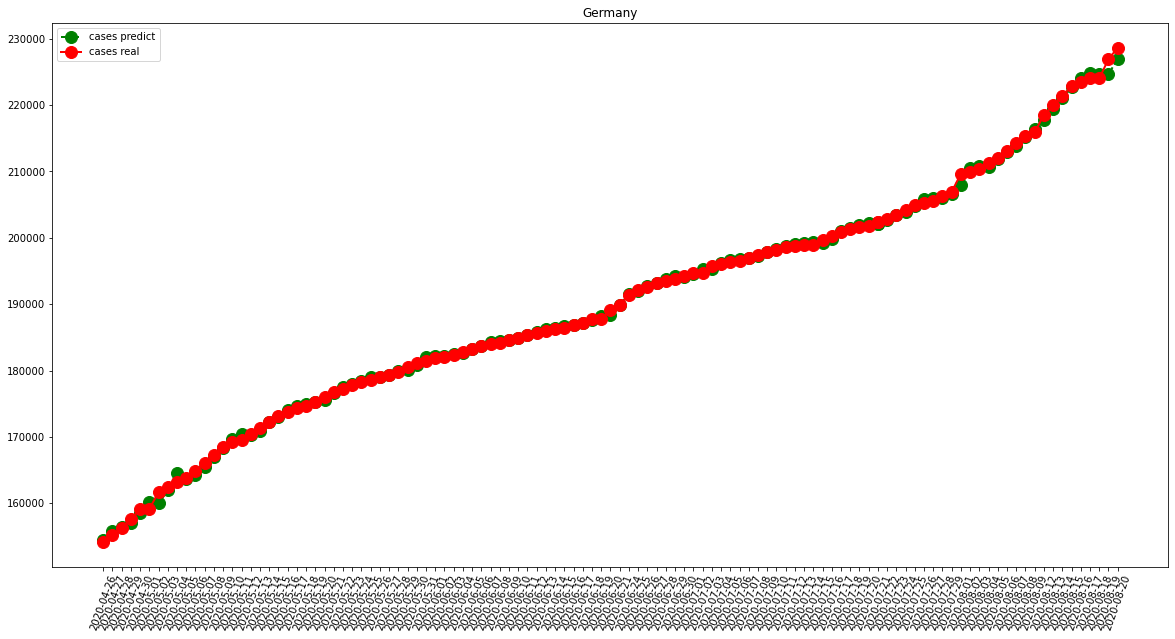

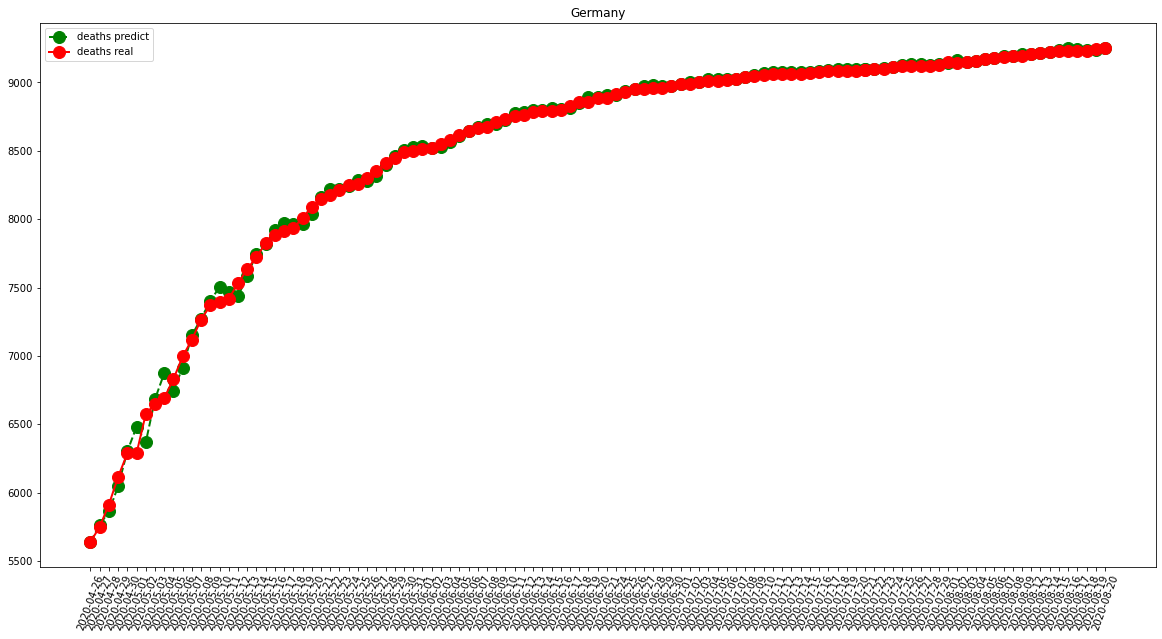

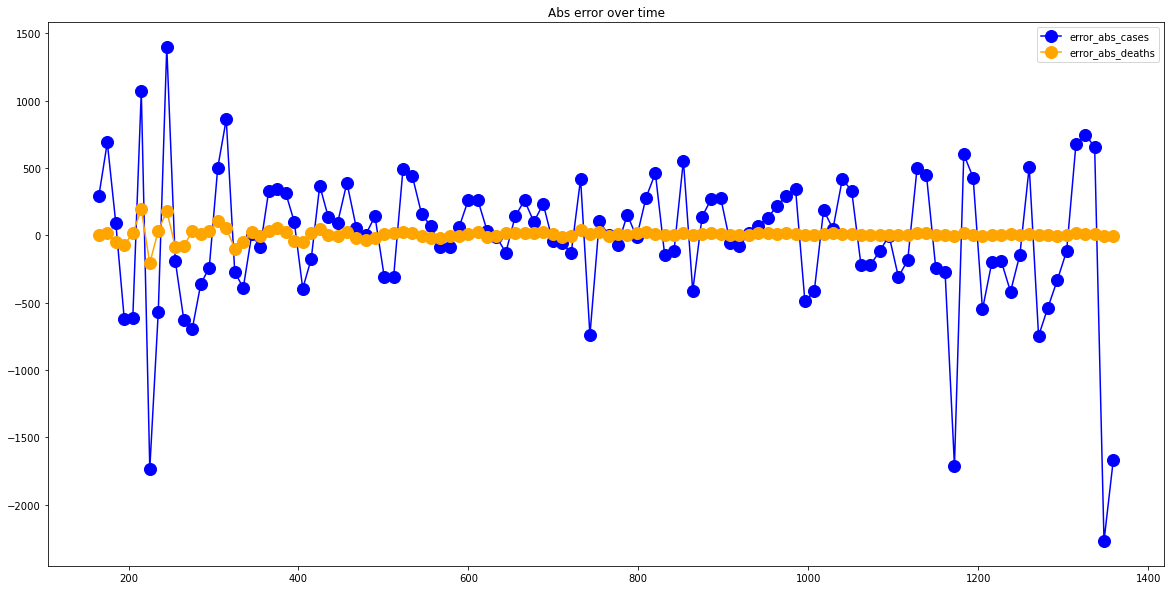

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  683.5089285714286
RMSE =  1014.4448208960688
-- Iran performances for deaths --
MAE =  36.339285714285715
RMSE =  73.78298293935107


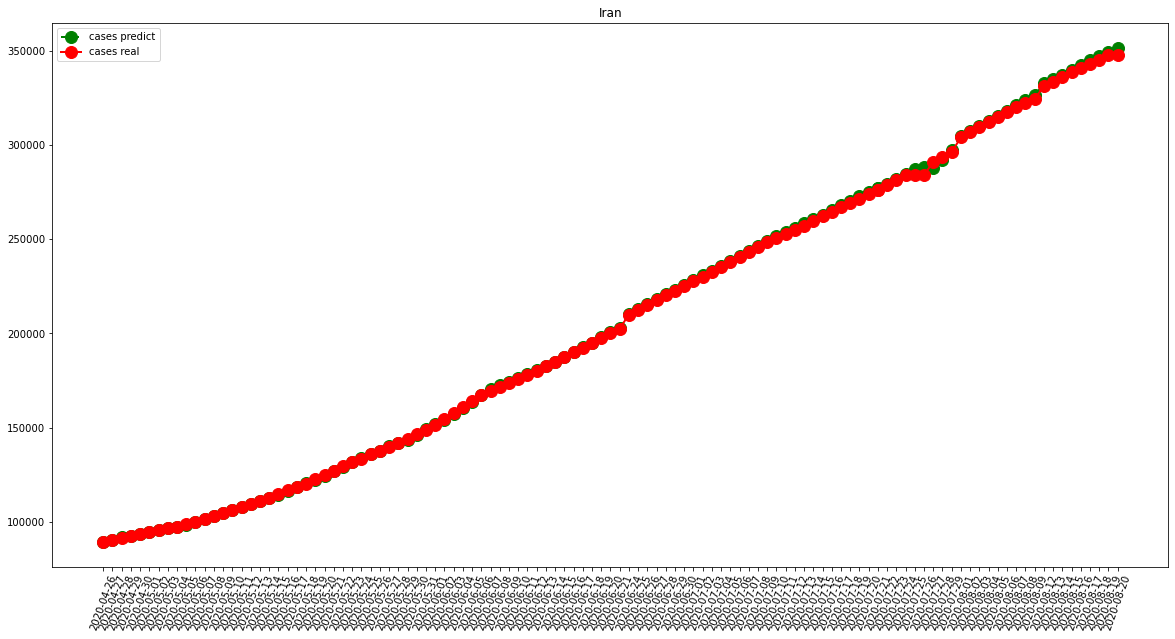

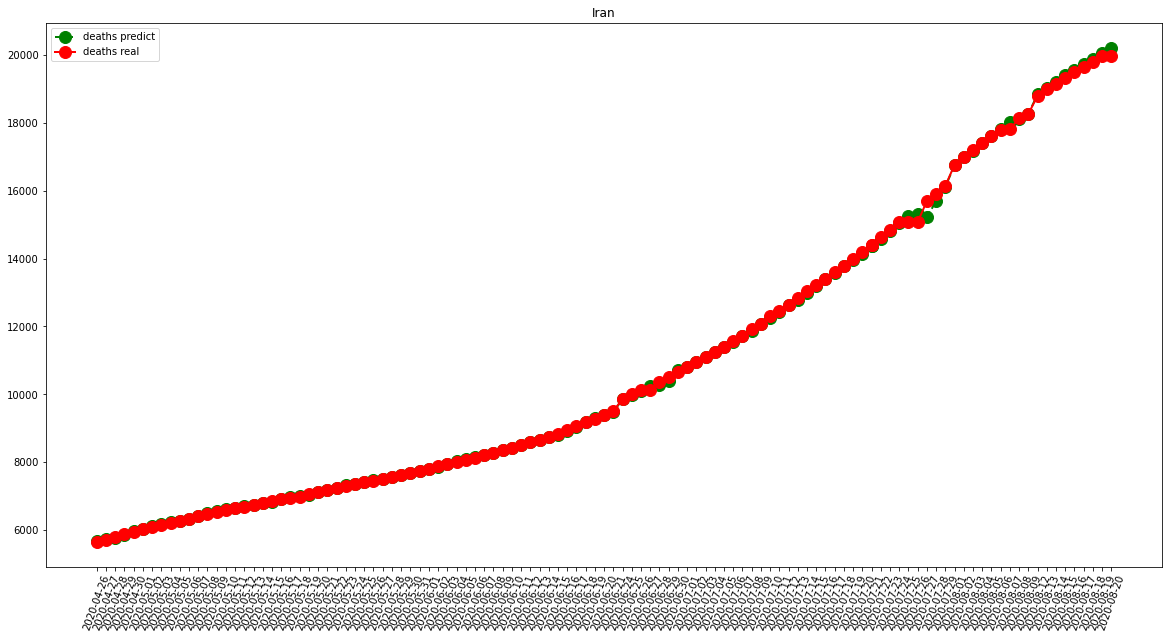

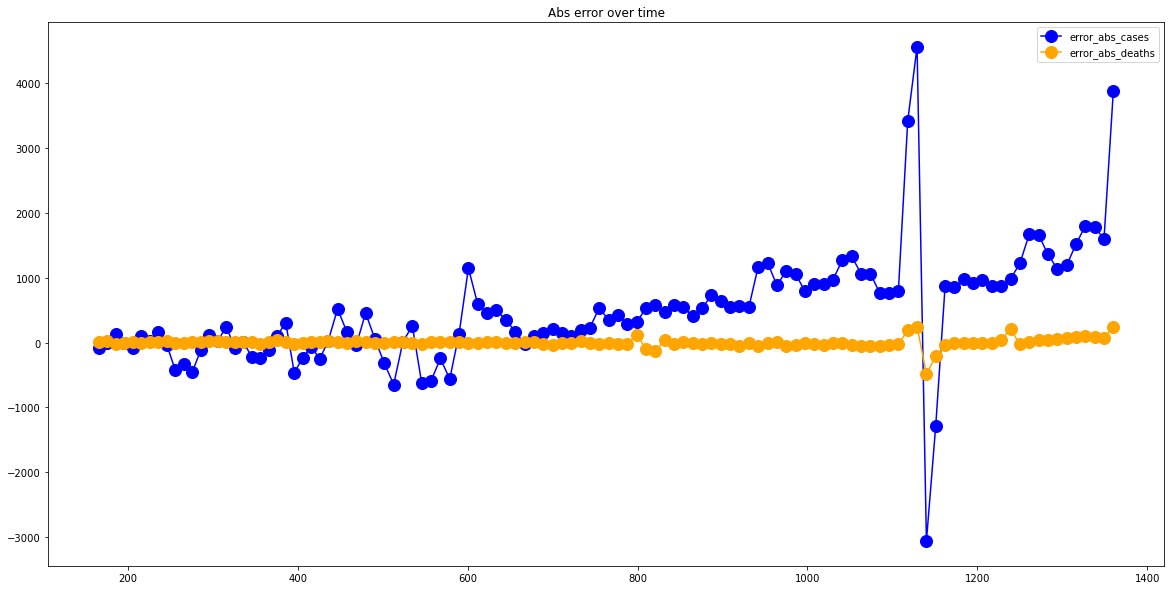

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.83035714285714
RMSE =  330.9430383659054
-- Turkey performances for deaths --
MAE =  17.285714285714285
RMSE =  95.92659023589712


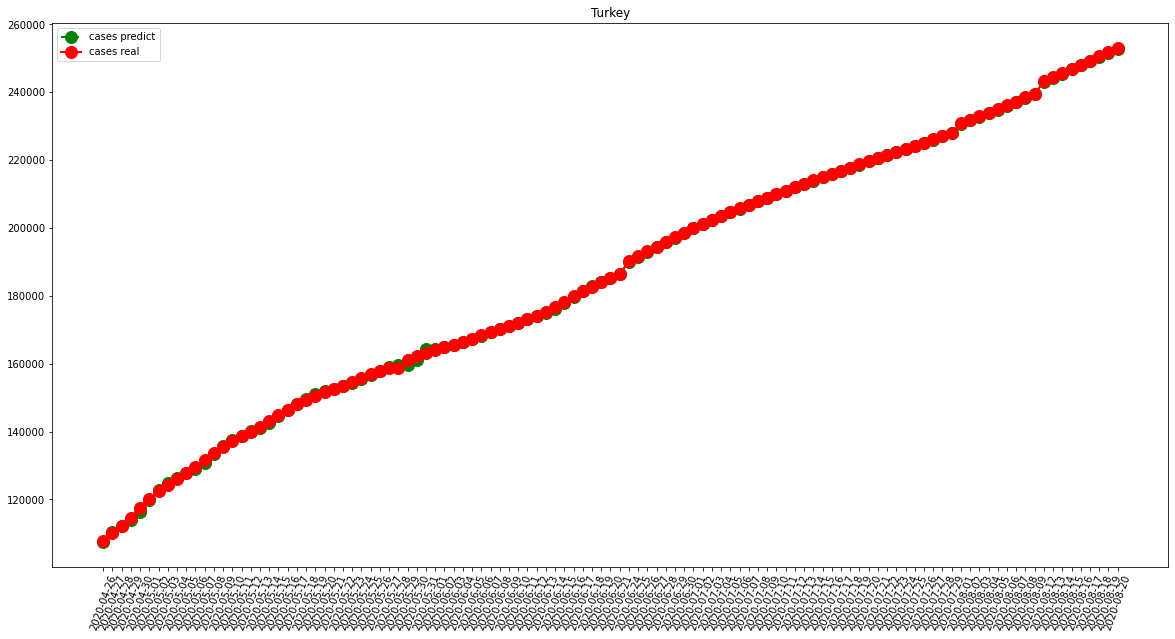

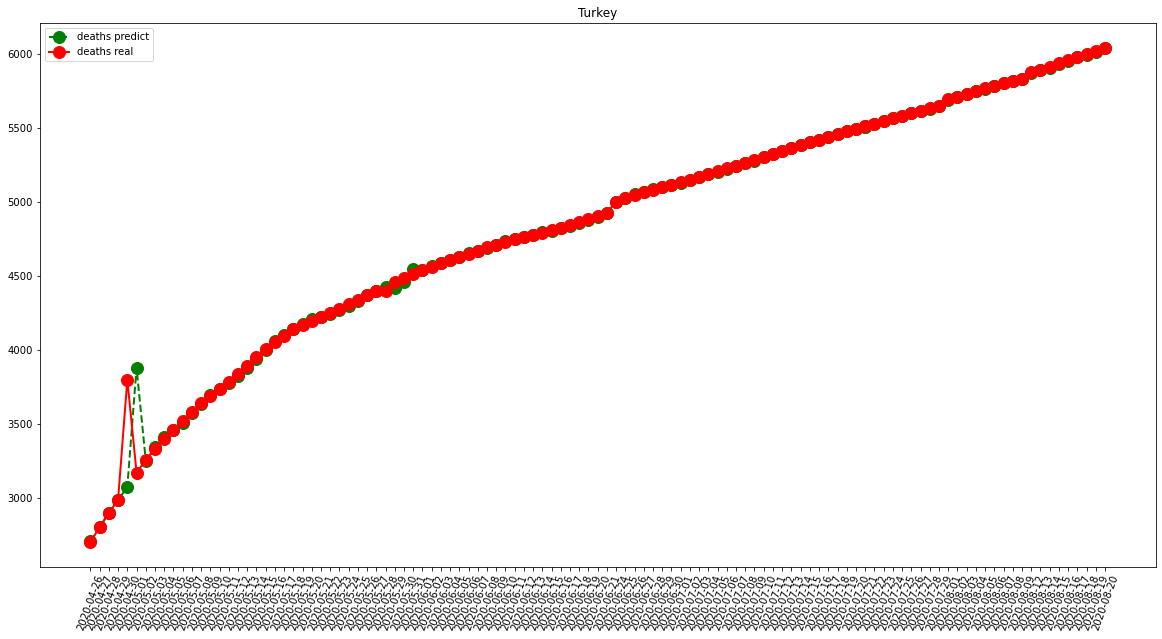

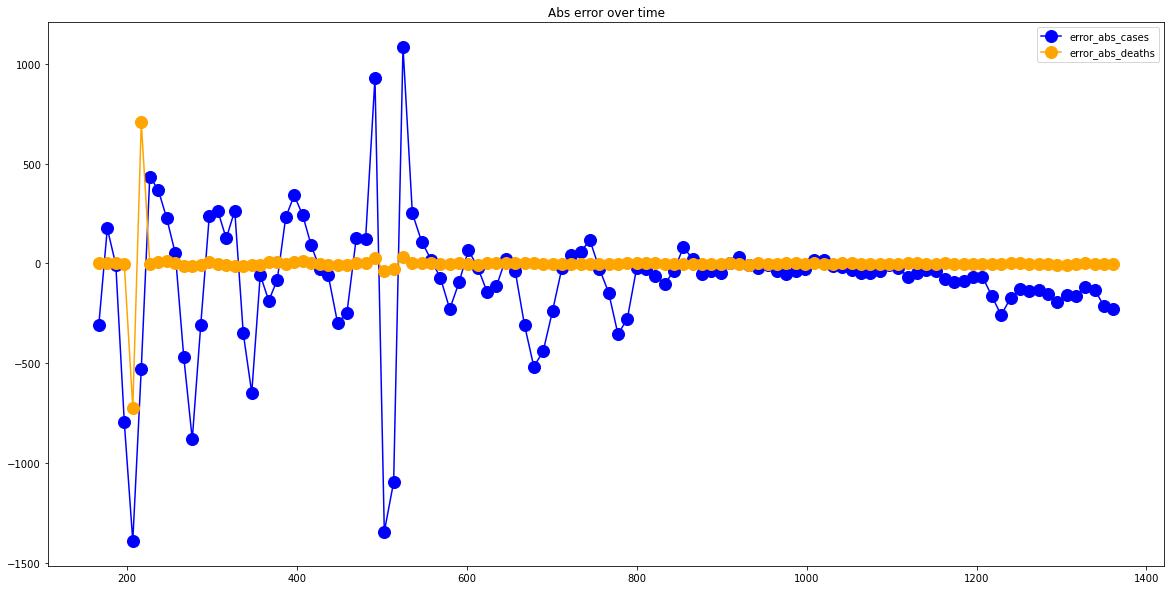

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12527.823529411764
RMSE =  16916.765218876455
-- Brazil performances for deaths --
MAE =  404.6235294117647
RMSE =  499.45281823917946


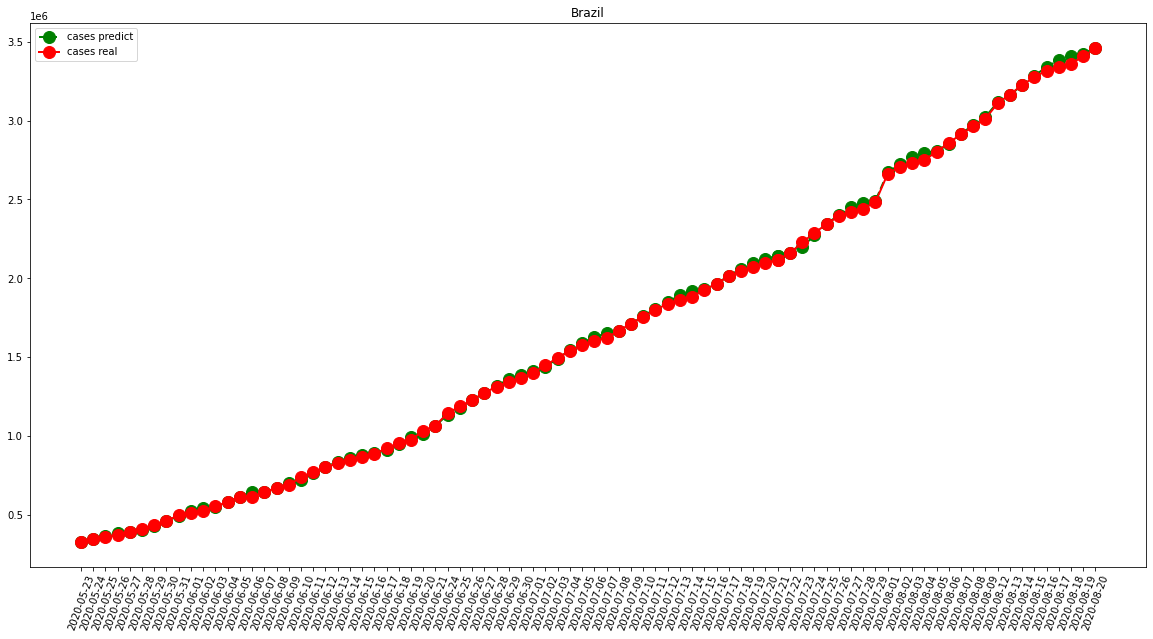

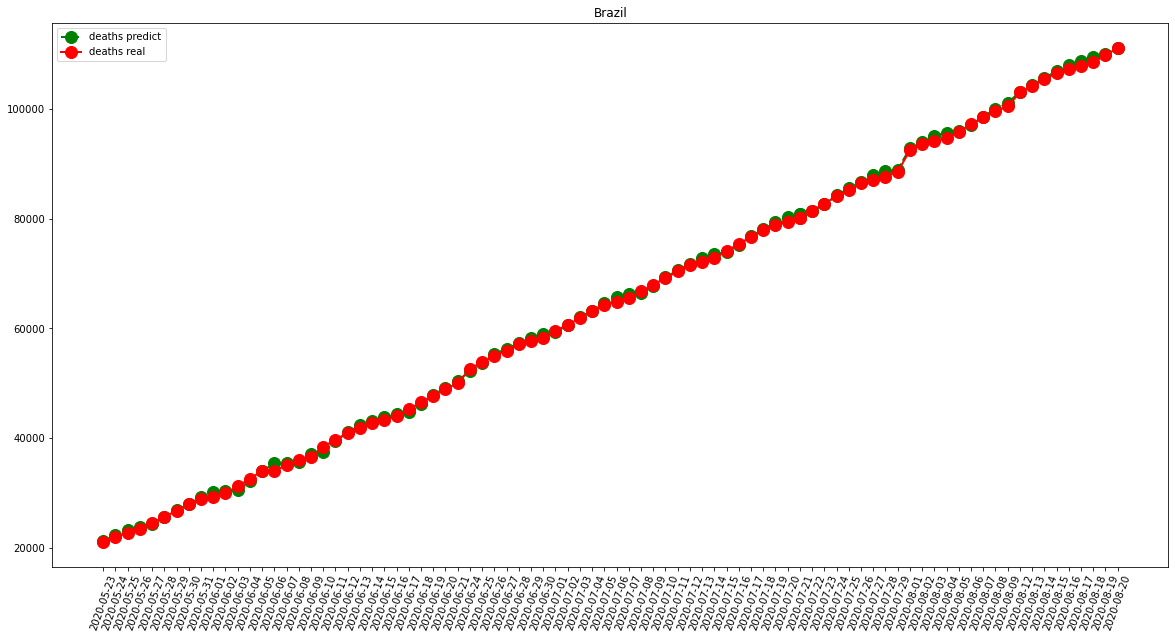

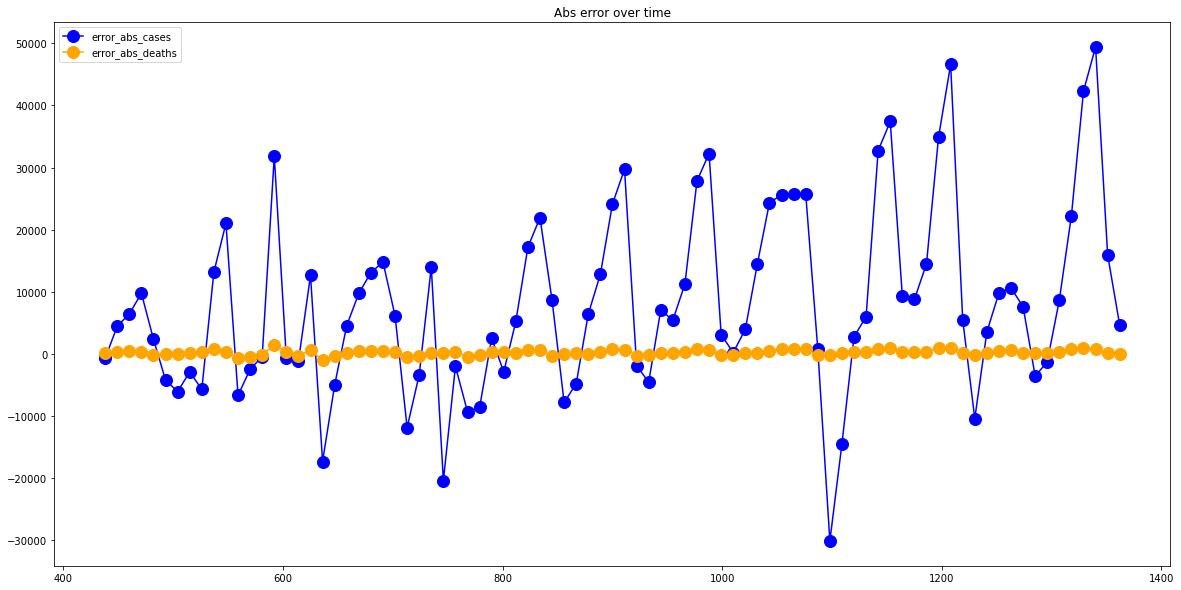

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)